# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [0]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

In [0]:
# Write your code here
import pandas as pd
url = 'https://raw.githubusercontent.com/DeepakSaiPaty/Deepaksai_INFO5731_Spring2020/master/Sentiment_analysis.csv'
df = pd.read_csv(url, error_bad_lines=False)

In [0]:

import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from nltk.tokenize import RegexpTokenizer
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


In [0]:
tokenizer = RegexpTokenizer(r'\w+')
for i in df['Cleaned_text']:
    # clean and tokenize document string
    raw = i.lower()
    if(i=='spoiler content'):
      continue
    texts.append(tokenizer.tokenize(raw))

In [0]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(texts, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[texts], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)



/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [0]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [0]:
data_words_bigrams = make_bigrams(texts)
data_words_trigrams=make_trigrams(data_words_bigrams)

In [0]:
#1.1 Features Used for Topic modelling
from collections import Counter
as_words=[]
for k in data_words_trigrams:
  for m in k:
    as_words.append(m)
matching = [s for s in as_words if "_" in s]
Counter(matching)

Counter({'comic_book': 32,
         'de_niro': 2,
         'edge_seat': 6,
         'heath_ledger': 16,
         'king_comedy': 8,
         'mental_health': 12,
         'mental_illness': 16,
         'prince_crime': 6,
         'robert_de_niro': 6,
         'taxi_driver': 22,
         'todd_phillips': 18})

In [0]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_trigrams)

#Corpus is data_words_trigrams
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_words_trigrams]


In [0]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [0]:
#1.2 Top 10 Clusters of Topic Modelling
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.037*"movie" + 0.012*"like" + 0.011*"good" + 0.010*"joker" + 0.009*"film" '
  '+ 0.008*"people" + 0.008*"think" + 0.008*"movies" + 0.008*"even" + '
  '0.007*"phoenix"'),
 (1,
  '0.021*"comic_book" + 0.019*"joker" + 0.014*"making" + 0.013*"film" + '
  '0.013*"society" + 0.010*"character" + 0.010*"phoenix" + 0.009*"perfect" + '
  '0.008*"shows" + 0.007*"best"'),
 (2,
  '0.015*"movie" + 0.013*"joker" + 0.013*"best" + 0.011*"moments" + '
  '0.011*"part" + 0.007*"one" + 0.007*"movies" + 0.007*"mental_illness" + '
  '0.007*"different" + 0.007*"endgame"'),
 (3,
  '0.030*"joker" + 0.025*"movie" + 0.012*"one" + 0.012*"phoenix" + '
  '0.009*"joaquin" + 0.009*"best" + 0.008*"movies" + 0.007*"time" + '
  '0.007*"cinema" + 0.007*"feel"'),
 (4,
  '0.015*"better" + 0.015*"really" + 0.008*"joker" + 0.008*"movie" + '
  '0.008*"see" + 0.008*"one" + 0.008*"way" + 0.008*"shows" + 0.008*"much" + '
  '0.008*"hype"'),
 (5,
  '0.045*"movie" + 0.020*"joker" + 0.015*"people" + 0.010*"dark" + '
  '0.010

In [0]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.946878111600936

Coherence Score:  0.30269336825708876


In [0]:
pip install pyLDAvis

In [0]:
# Visualize the topics
from pyLDAvis import gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.077834  0.049571       1        1  20.365631
8      0.143027  0.006857       2        1  19.048962
5      0.084991  0.055570       3        1  15.343308
3      0.112056 -0.021868       4        1  14.090260
7     -0.093957  0.177077       5        1   9.325924
9     -0.018120 -0.096399       6        1   8.195196
1     -0.024047 -0.124874       7        1   5.726482
6     -0.121475 -0.026698       8        1   4.137112
2     -0.081066 -0.004937       9        1   3.241259
4     -0.079243 -0.014298      10        1   0.525867, topic_info=          Term        Freq       Total Category  logprob  loglift
32        film   97.000000   97.000000  Default  30.0000  30.0000
427     really   40.000000   40.000000  Default  29.0000  29.0000
42       joker  199.000000  199.000000  Default  28.0000  28.0000
136     better   30.000000   30.000000  Default  27.0000  27.0000
280        get   38.000000   38.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
149        one    0.489672   67.504036  Topic10  -4.8439   0.3217
42       joker    0.489695  199.214310  Topic10  -4.8438  -0.7605
111      movie    0.489691  368.440033  Topic10  -4.8438  -1.3754
140       feel    0.022269   48.946789  Topic10  -7.9344  -2.4474
93   character    0.022265   76.855324  Topic10  -7.9346  -2.8988

[688 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1487      4  0.767992    account
442       1  0.279564   accurate
442       3  0.698909   accurate
1         1  0.206439     acting
1         2  0.187672     acting
...     ...       ...        ...
729       1  0.173937        yes
729       2  0.521810        yes
729       7  0.260905        yes
406       4  0.779267  yesterday
791       5  0.948004      youve

[1135 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 9, 6, 4, 8, 10, 2, 7, 3, 5])

##### 1.3)The above distance map gives how each topic is related to other.
##### The weights reflect how important a keyword is to that topic.
##### **Topic -1** discuss about, How good joker movie is.
##### **Topic -2** Is about comic book
##### **Topic -3** Is about mental illness
##### **TOpic -4** Is about Cinematic Feel of movie joker.
##### **Topic -5** Is about Joker movie Hype
##### **Topic -6** Is about joker character in the movie.
##### **Topic -7** Is about joaquin acting in the movie joker.
##### **Topic -8** Is about Joker movie comparison with someother.
##### **Topic -9** Is about joker Movie story.
##### **Topic -10** Joker movie Cinematography


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification

In [0]:
np.random.seed(500)

In [0]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['Cleaned_text'],df['sentiment'],test_size=0.2) #20 percent test data and remaining for training

Briefly, we segment each document into words (for English splitting by space), and count # of times each word occurs in each document and finally assign each word an integer id. Each unique word in our dictionary will correspond to a feature (descriptive feature).
Here by doing ‘count_vect.fit_transform(twenty_train.data)’, we are learning the vocabulary dictionary and it returns a Document-Term matrix. [n_samples, n_features].
**TF:** Just counting the number of words in each document has 1 issue: it will give more weightage to longer documents than shorter documents. To avoid this, we can use frequency (TF - Term Frequencies) i.e. #count(word) / #Total words, in each document.
**TF-IDF:** Finally, we can even reduce the weightage of more common words like (the, is, an etc.) which occurs in all document. This is called as TF-IDF i.e Term Frequency times inverse document frequency.
We can do this by following,

In [0]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)
Tfidf_vect = TfidfVectorizer(ngram_range=(1,2),max_features=500)   #Here selected top 1000 1-gram and 2-gram features 
#Tfidf_vect = TfidfVectorizer(max_features=1000)
Tfidf_vect.fit(df['Cleaned_text'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [0]:
print(list(Tfidf_vect.vocabulary_.keys())[:500]) #Features selected for classification

['person', 'saw', 'hype', 'masterpiece', 'another', 'joker', 'based', 'film', 'thought', 'looked', 'best', 'even', 'bit', 'trailer', 'say', 'incredibly', 'wrong', 'cinema', 'thats', 'day', 'cgi', 'somewhat', 'origin', 'start', 'comics', 'past', 'joaquin', 'cries', 'every', 'performance', 'heath', 'ledger', 'would', 'greatest', 'acting', 'directing', 'writing', 'brilliant', 'throughout', 'away', 'audience', 'could', 'still', 'characters', 'world', 'believe', 'going', 'heath ledger', 'movie', 'truly', 'makes', 'joaquins', 'haunting', 'hard', 'watch', 'times', 'wont', 'watching', 'funny', 'moments', 'emotional', 'sometimes', 'multiple', 'emotions', 'far', 'typical', 'predictable', 'superhero', 'proper', 'psychological', 'single', 'character', 'development', 'ever', 'seen', 'joaquins performance', 'superhero movie', 'character development', 'felt', 'alone', 'relate', 'understand', 'feel', 'lot', 'people', 'see', 'think', 'violence', 'one', 'us', 'become', 'better', 'everyone', 'make', 'lik

2.1)
**Advantages of Feature selection before using Model:**

->Reducing the number of features will surely reduce the computational complexity of the model.

->It might increase the accuracy of the model but not necessarily(Depends on type of data working on).

->Feature selection helps to filter noise from the dataset and that will benefit any algorithm.

->Feature selection can reduce overfitting and improve hold out performance.

**Key note:**

->Here I have selected only 500 1-gram and 2-gram features for classification because it will reduce computational complexity instead of checking for all the extracted features.

->Accuracy of the model increased with the above features.







In [0]:
# 2.2)
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
target_names = ['Positive', 'Negative', 'Neutral']
print(classification_report(Test_Y, predictions_NB,target_names=target_names))

              precision    recall  f1-score   support

    Positive       1.00      0.57      0.73         7
    Negative       1.00      0.33      0.50         3
     Neutral       0.67      1.00      0.80        10

    accuracy                           0.75        20
   macro avg       0.89      0.63      0.68        20
weighted avg       0.83      0.75      0.73        20



In [0]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
print(classification_report(Test_Y, predictions_SVM,target_names=target_names))

              precision    recall  f1-score   support

    Positive       0.86      0.86      0.86         7
    Negative       1.00      0.33      0.50         3
     Neutral       0.75      0.90      0.82        10

    accuracy                           0.80        20
   macro avg       0.87      0.70      0.73        20
weighted avg       0.82      0.80      0.78        20



2.3)
**True Positives (TP)** - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.

**True Negatives (TN)** -These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no.

**False Positives (FP)** – When actual class is no and predicted class is yes. 

**False Negatives (FN)-** When actual class is yes but predicted class in no.

**Accuracy -** Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations.
Accuracy = TP+TN/TP+FP+FN+TN

Accuracy in **NB classifier**-75%

Accuracy in **SVM classifier-**80%

**Precision -** Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.

Precision in **NB classifier**-Positive-100%,Negative-100%,Neutral-67%

Precision in **SVM classifier**-Positive-86%,Negative-100%,Neutral-75%

**Recall (Sensitivity) -** Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.

Recall = TP/TP+FN

Recall in **NB classifier** -Positive-57% Negative-33% Neutral-100%

Recall in **SVM classifier**-Positive-86% Negative-33% Neutral-90%

**F1 score -** F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

F1 Score in **NB classifier** -Positive-73% Negative-50% Neutral-80%

F1 Score in **SVM classifier**-Positive-86% Negative-50% Neutral-82%

**For the above Data, SVM model suits more for classification when compared with Naive bayes.**


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
# Write your code here
import pandas as pd
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

In [0]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Here we can clearly observe that there is no target variable 'saleprice' in test data.

In [0]:
#check to see if there are any missing values in our data set
train.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [0]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [0]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

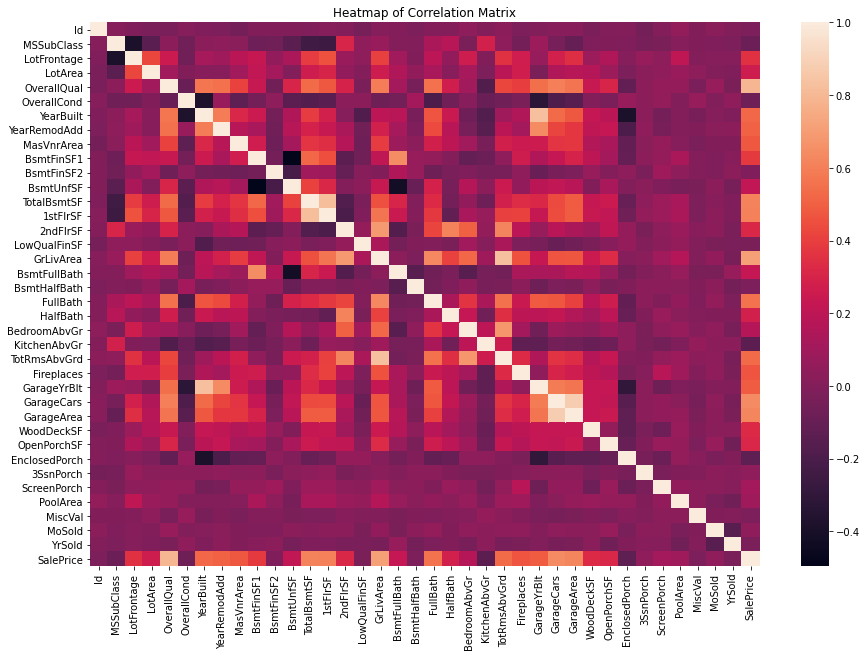

In [0]:
#correlation matrix will explain what features correlate the most with SalePrice? 
corr = train.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')

Text(0.5, 1.0, 'Heatmap of new Correlation Matrix')

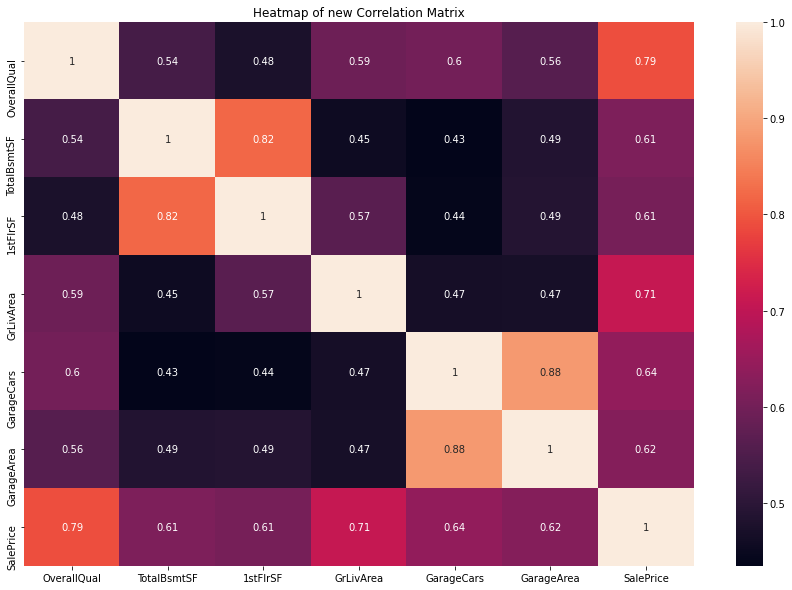

In [0]:
#correlation matrix for the highly correlated variables
new_cols = list(corr.SalePrice[(corr.SalePrice > 0.6)].index.values)
new_corr = train[new_cols].corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(new_corr, annot=True,xticklabels=new_corr.columns.values,yticklabels=new_corr.columns.values)
plt.title('Heatmap of new Correlation Matrix')

->From the above heatmaps we can observe that 'OverallQual', 'GrLivArea', 'GarageCars' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.

->'GarageCars' and 'GarageArea' are proportional to each other hence we can keep any one of the two features.

->'TotalBsmtSF' and '1stFloor' are proportional to each other hence we can keep any one of the two features.

(It is better two choose feature with high correlation with required field for effective analysis)

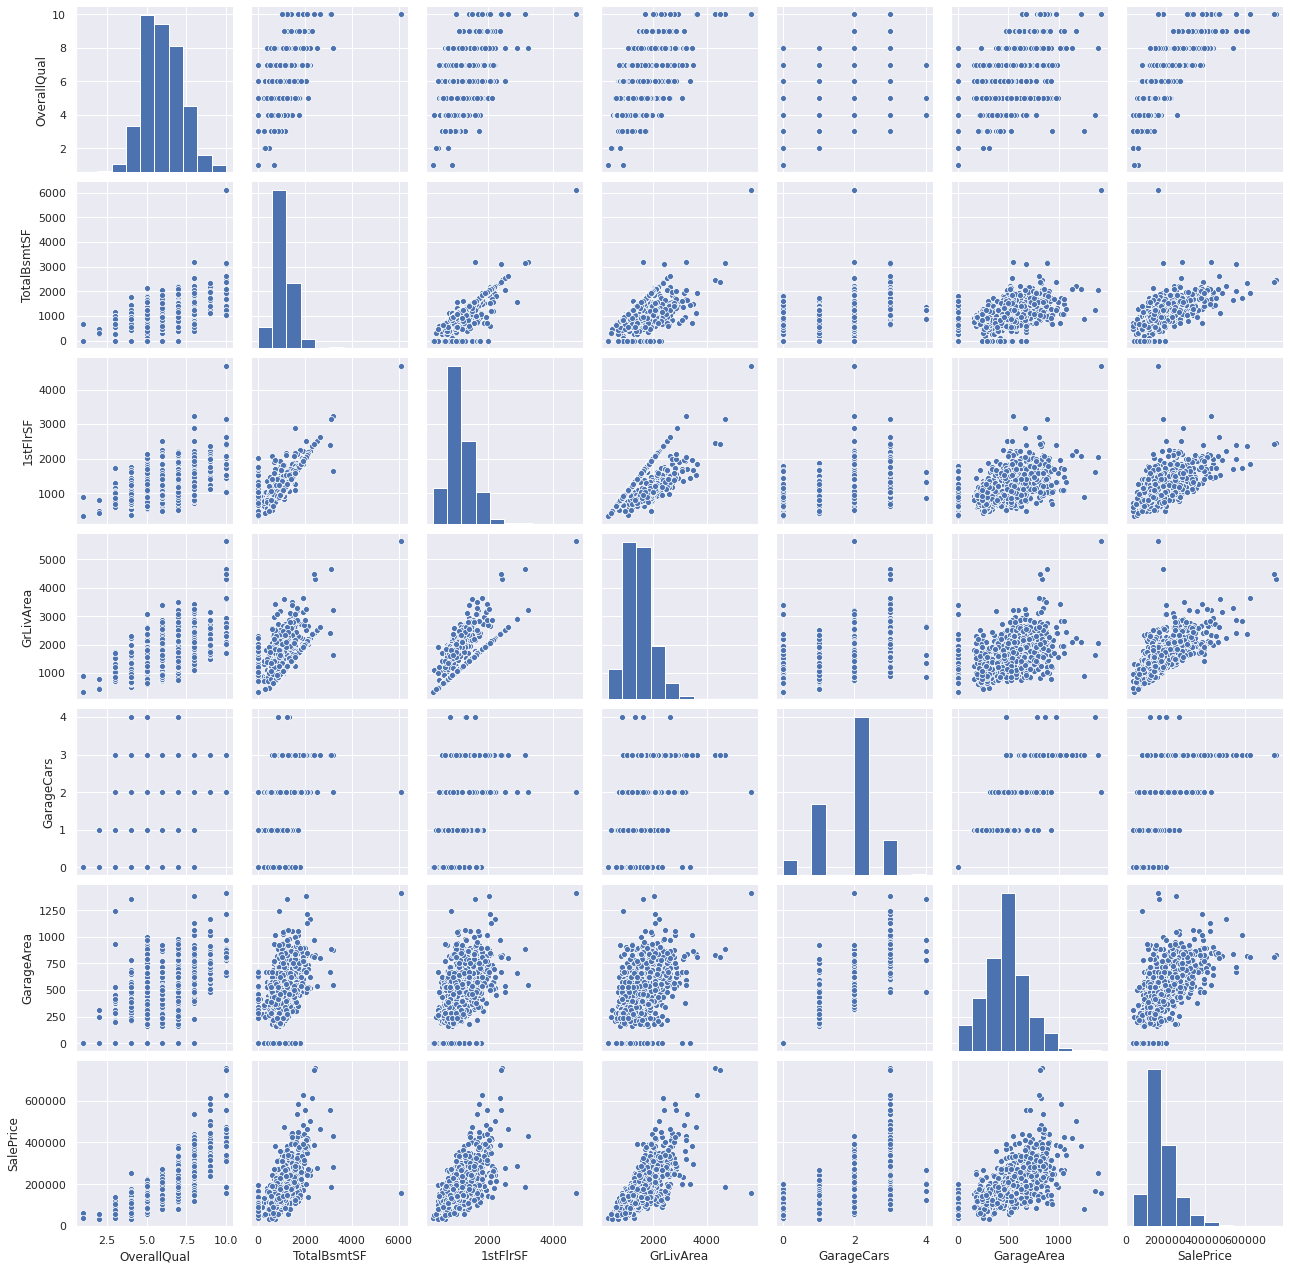

In [0]:
#pairplot for all the highly correlated variables and SalePrice
sns.set()
sns.pairplot(train[new_cols], size=2.5)

The above scatterplot gives an idea of how the features are changing with saleprice.

**Exploratory Data Analysis-**

Here we have plotted higly corelated numerical features to have a better understanding of their relationship with the SalePrice.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


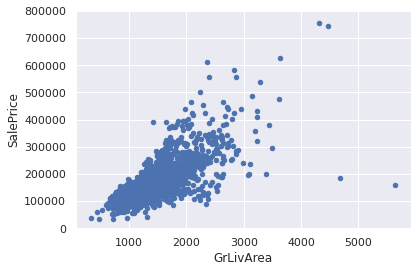

In [0]:
data = pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000))

'SalePrice' and 'GrLivArea' are linearly related. That means as GrLivArea increases, SalePrice increases.So with this we can confirm more the the living area higher the sale price.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


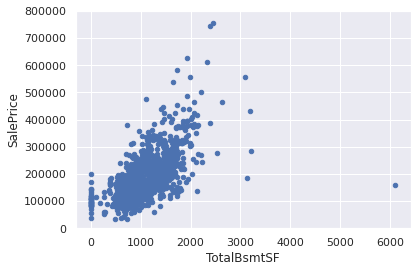

In [0]:
data = pd.concat([train['SalePrice'], train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000))

'TotalBsmtSF' is also linearly related to 'SalePrice'. That means as TotalBsmtSF increases, SalePrice also increases.

(-0.5, 9.5, 0.0, 800000.0)

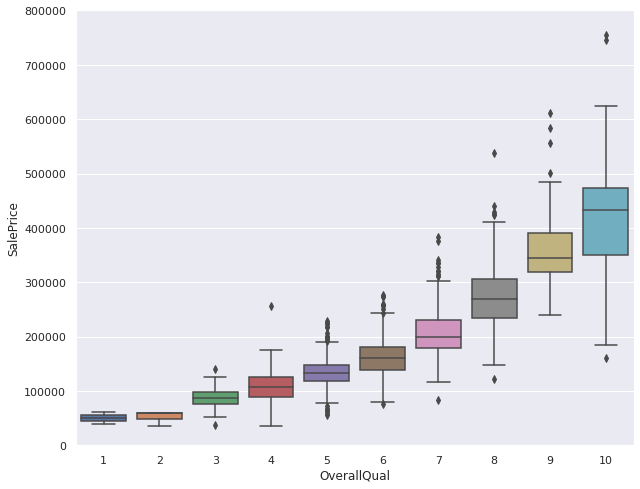

In [0]:
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

Here from the above plot we can observe that 'SalePrice' increases with 'OverallQual'. As the OverallQual increases, the SalePrice also increases ans vice versa.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text major ticklabel objects>)

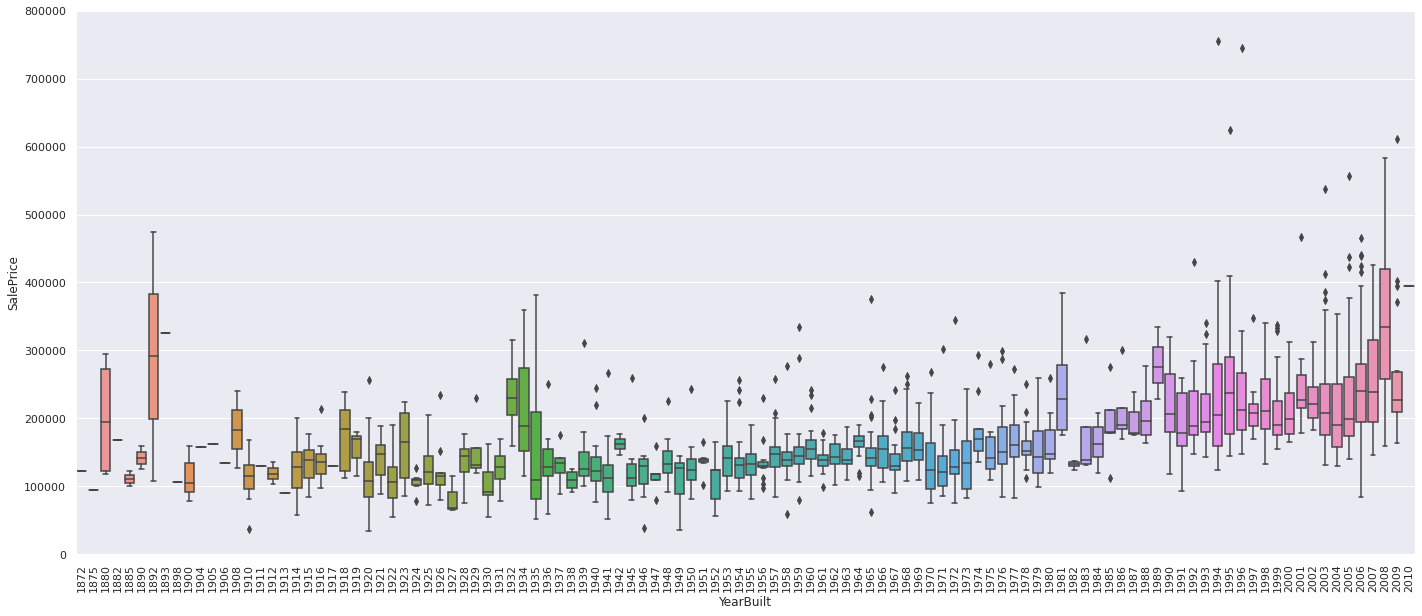

In [0]:
data = pd.concat([train['SalePrice'], train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(24, 10))
fig = sns.boxplot(x='YearBuilt', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

If we observe here, 'SalePrice' is not highly correlated with the 'YearBuilt'.Hence 'YearBuilt' is not a very significant feature for 'SalePrice' according to data.

Check for any outliers->

In [0]:
#Preprocessing
#univariate analysis
from sklearn.preprocessing import StandardScaler
# standardizing data
saleprice_scaled = StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis])
#Low and high ranges of our newly scaled data
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

print('\nouter range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)


outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


Low range values are similar and not too far from 0. High range values are farther from 0 compared to the low range values.



Text(0.5, 0, 'GrLivArea')

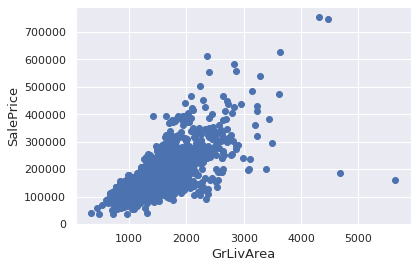

In [0]:
# bivariate analysis 
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)

From the above plot we can observe that except two points on the top all seem to be following the trend. The two points seem to be a special case and we will include them in our analysis.

Text(0.5, 0, 'GrLivArea')

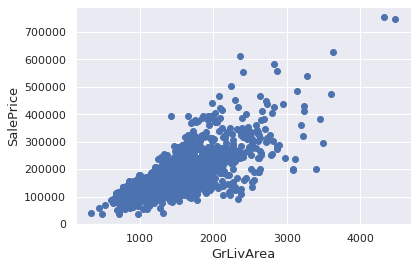

In [0]:
# Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
#check in graph
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)

From the above we can observe outliers are removed.

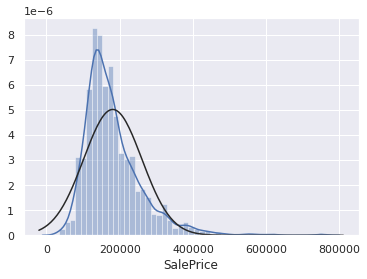

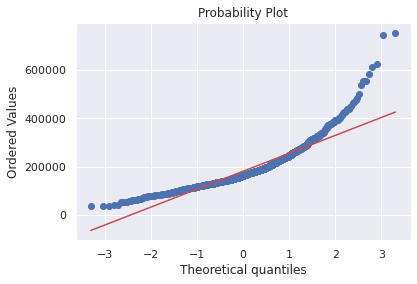

In [0]:
# histogram and normal probability plot of SalePrice
sns.distplot(train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)


The distribution of the target variable which is the SalePrice is right skewed here.Hence we need to correct it.

In [0]:
train['SalePrice'].skew()

1.8812964895244009

In [0]:
# Applying log transformation 
train['SalePrice'] = np.log1p(train['SalePrice'])

In [0]:
# Checking the skewness of the SalePrice again
train['SalePrice'].skew()

0.12157976050304879

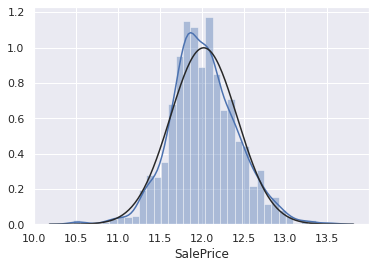

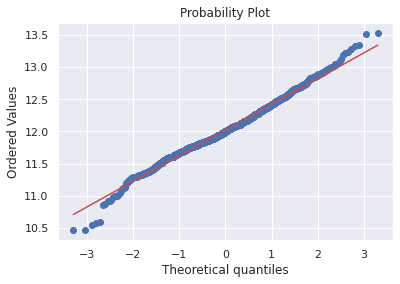

In [0]:
# transformed histogram and normal probability plot after the log transformation.
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

Data Cleaning-

Here we will concatenate both train and test data perform data cleaning, and then split train and test data.

In [0]:
# Concatenating the train and test data in the same dataframe
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data.shape

(2919, 80)

In [0]:
# Missing data
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Percentage' :all_data_na})
missing_data.head(20)

,Missing Percentage
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageYrBlt,5.447071
GarageQual,5.447071
GarageCond,5.447071


Now Fill the missing values.

In [0]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [0]:
# Again check for missings in all_data data
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data_all_data = pd.DataFrame({'Missing Percentage' :all_data_na})
missing_data_all_data.head(20)

,Missing Percentage


Here there is no missing fields in whole data.

In [0]:
#Transforming some numerical variables that really are categorical
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
# Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
# Year and month sold are transformed into categorical features
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [0]:
#Label Encoding some of the categorical variables that may contain information in their ordering set
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond','ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold')
# Applying LabelEncoder to the categorical features
for col in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[col].values)) 
    all_data[col] = lbl.transform(list(all_data[col].values))


Since area related features are very important to determine house prices, we can add one more feature which is the total area of basement, first and second floor areas of each house.

In [0]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [0]:
all_data = pd.get_dummies(all_data)

In [0]:
X_train = all_data[:ntrain]
X_test = all_data[ntrain:]
y_train = train.SalePrice

In [0]:
from sklearn.linear_model import LinearRegression

# Fit Linear Regression on Training Set
LRegression= LinearRegression()
LRegression.fit(X_train, y_train)

# Score linear regression model
LRegression.score(X_train, y_train)

0.9191639758085091

In [0]:
y_pred = LRegression.predict(X_test)
df = pd.DataFrame({'Predicted Sale value of Houses': y_pred.flatten()})
df

,Predicted Sale value of Houses
0,119462.199671
1,164033.960028
2,175677.403349
3,180613.962538
4,213497.447800
...,...
1454,77318.890628
1455,64211.265432
1456,173482.537017
1457,109436.067337
